## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape


print("We have {} rows in the dataset.".format(df.shape[0]))

We have 294478 rows in the dataset.


c. The number of unique users in the dataset.

In [4]:
nunique_users = df['user_id'].nunique()


print("There are {} unique users in the dataset.".format(nunique_users))

There are 290584 unique users in the dataset.


d. The proportion of users converted.

In [5]:
convert_rate_of_users = df['converted'].sum() / df['user_id'].nunique()


print("{}% of users converted".format(convert_rate_of_users))

0.12126269856564711% of users converted


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [7]:
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [8]:
df['landing_page'].value_counts()

new_page    147239
old_page    147239
Name: landing_page, dtype: int64

In [9]:
df_e = df[((df.group == 'treatment') & (df.landing_page != 'new_page')) | ((df.group != 'treatment') & (df.landing_page == 'new_page'))] 

In [10]:
df_e.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [11]:
print(df_e.shape[0])
print('new_page and treatment don\'t line up for {} times'.format(df_e.shape[0]))

3893
new_page and treatment don't line up for 3893 times


f. Do any of the rows have missing values?

In [12]:
df_e.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [13]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
df2 = df[((df.group == 'treatment') & (df.landing_page == 'new_page')) | ((df.group == 'control') & (df.landing_page == 'old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
print("There are {} unique users in df2".format(df2['user_id'].nunique()))

There are 290584 unique users in df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [18]:
df2.loc[df2['user_id'].duplicated(keep='first'),:]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [19]:
userid_duplicated = df2.loc[df2['user_id'].duplicated(keep='first'),:]['user_id']
userid_duplicated = np.array(userid_duplicated)[0]

print("There is a repeated user id: {} in df2".format(userid_duplicated))

There is a repeated user id: 773192 in df2


c. What is the row information for the repeat **user_id**? 

In [20]:
df2.loc[df2['user_id'].duplicated(keep='first'), :]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [21]:
row_userid_duplicated = df2.loc[df2['user_id'].duplicated(keep='first'), :].index
row_userid_duplicated = np.array(row_userid_duplicated)[0]

print("There is a repeated user id in row {} of df2".format(row_userid_duplicated))

There is a repeated user id in row 2893 of df2


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [22]:
df2.shape

(290585, 5)

In [23]:
df2.drop_duplicates(subset='user_id', inplace=True)
df2.shape

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [24]:
print("The convert rate(regardless of the page) is {} ".format(df2['converted'].mean()))

The convert rate(regardless of the page) is 0.11959708724499628 


In [25]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Given that an individual was in the `control` group, what is the probability they converted?

In [26]:
convert_rate_of_control = df2[df2['group']=='control']['converted'].mean()

print("The convert rate of the control group is {} ".format(convert_rate_of_control))

The convert rate of the control group is 0.1203863045004612 


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [27]:
convert_rate_of_treatment = df2[df2['group']=='treatment']['converted'].mean()

print("The convert rate of the control group is {} ".format(convert_rate_of_treatment))

The convert rate of the control group is 0.11880806551510564 


d. What is the probability that an individual received the new page?

In [28]:
ratio_of_new_page = df2[df2['landing_page']=='new_page']['landing_page'].count() / df2['landing_page'].count()

print("The probability that an individual received the new page is: {}".format(ratio_of_new_page))

The probability that an individual received the new page is: 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**My answer**: Based on the results above, there is no evidence to prove that the new treatment page leads to more conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**To prove new page is better than old page, null and alternative hyptoehses come as follows:**

$$H_0: p_{new} - p_{old}  <= 0$$


$$H_1: p_{new} - p_{old}  > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [29]:
p_new = df2[df2['landing_page'] == 'new_page']['converted'].mean()


print("The convert rate of new page(p_new) is: {}".format(p_new))

The convert rate of new page(p_new) is: 0.11880806551510564


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [30]:
p_old = df2[df2['landing_page'] == 'old_page']['converted'].mean()

print("The convert rate of old page(p_old) is: {}".format(p_old))

The convert rate of old page(p_old) is: 0.1203863045004612


In [31]:
# (Reminder) H0: p_new - p_old <= 0

print("p_new - p_old = {}".format(p_new - p_old))

p_new - p_old = -0.0015782389853555567


c. What is $n_{treatment}$, the number of individuals in the treatment group?

In [32]:
n_treatment = df2[df2['group'] == 'treatment'].shape[0]


print("The number of individuals in treatment group(n_treatment) is: {}".format(n_treatment))

The number of individuals in treatment group(n_treatment) is: 145310


d. What is $n_{control}$, the number of individuals in the control group?

In [33]:
n_control = df2[df2['group'] == 'control'].shape[0]


print("The number of individuals in control group(n_control) is: {}".format(n_control))

The number of individuals in control group(n_control) is: 145274


e. Simulate $n_{treatment}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{treatment}$ 1's and 0's in **new_page_converted**.

In [34]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [35]:
new_page_converted = np.random.binomial(n=1, p=p_new, size=n_treatment)
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{control}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{control}$ 1's and 0's in **old_page_converted**.

In [36]:
old_page_converted = np.random.binomial(n=1, p=p_old, size=n_control)
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [37]:
print("new_page_converted.mean() - old_page_converted.mean() = {}".format(new_page_converted.mean() - old_page_converted.mean()))

new_page_converted.mean() - old_page_converted.mean() = -0.0034160617233287005


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [38]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n=1, p=p_new, size=n_treatment)
    old_page_converted = np.random.binomial(n=1, p=p_old, size=n_control)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

    
    
p_diffs = np.array(p_diffs)
p_diffs.mean()

-0.0015657442244451632

In [39]:
p_diffs

array([-0.00042864, -0.00159223,  0.00041083, ..., -0.00082111,
       -0.00267923, -0.0034158 ])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [40]:
null_vals = np.random.normal(0, np.std(p_diffs), p_diffs.shape[0])

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

actual_diff = -0.0015782389853555567


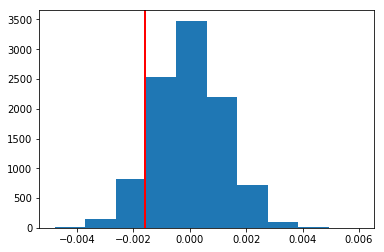

In [41]:
actual_diff = convert_rate_of_treatment - convert_rate_of_control
plt.hist(null_vals)
plt.axvline(x=actual_diff, color='r', linewidth=2)
print("actual_diff = {}".format(actual_diff))

In [42]:
print("The p-value of actual_diff is {}".format((null_vals > actual_diff).mean()))
print("actual_diff = {}".format(actual_diff))

# The p-value here is essentially (null_vals > actual_diff).mean()
# because of our alternative hypthesis(𝐻1):𝑝 𝑛𝑒𝑤 −𝑝 𝑜𝑙𝑑 >0 

The p-value of actual_diff is 0.9073
actual_diff = -0.0015782389853555567


In [43]:
p_diffs.shape

(10000,)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Result**: The p-value is approximately 90%, greater than 5%.
We fail to reject the null hypothesis: (p_new - p_old <= 0),
and conclude that the new page is not necessarily better than old page in terms of conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [44]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [45]:
n_old = df2[df['landing_page'] == 'old_page'].count()[0]
n_old

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


145274

In [46]:
n_new = df2[df['landing_page'] == 'new_page'].count()[0]
n_new

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


145310

In [47]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page']=='old_page']['converted'].sum()
convert_new = df2[df2['landing_page']=='new_page']['converted'].sum()

In [48]:
print("convert_old = {}".format(convert_old))
print("convert_new = {}".format(convert_new))

convert_old = 17489
convert_new = 17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [49]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
stat, pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [50]:
print("convert_rate_of_control = {}".format(convert_rate_of_control))
print("convert_rate_of_treatment = {}".format(convert_rate_of_treatment))

convert_rate_of_control = 0.1203863045004612
convert_rate_of_treatment = 0.11880806551510564


The p-value is approximately 90%, which fails to reject the null hypothesis: "convert_new / n_new <= convert_old / n_old". So it agrees with findings in part j and k that the new page is not necessarily better than old page in terms of conversion rate.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [51]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [52]:
df2['intercept'] = 1

group_dummies = pd.get_dummies(df2['group'])
df2_new = df2.join(group_dummies)
df2_new.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [53]:
df2_new.rename(columns={'treatment': 'ab_page'}, inplace=True)
df2_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [54]:
log_mod = sm.Logit(df2_new['converted'], df2_new[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:12:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page column is 0.19 which is lower than the p-value calculated using the z-score function. The reason why is different is due to the intercept added.**

**The logistic regression determines only two possible outcomes. If the new page is equal to the old page or different.**

$$H_0: Pold = Pnew$$


$$H_1: Pold \neq Pnew$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [56]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2_new.set_index('user_id'), how='inner')

In [57]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [58]:
df_new = df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

### Create the necessary dummy variables

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [59]:
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']


In [60]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA_ab_page','UK_ab_page']])
results = log_mod.fit()
results.summary()

### Fit Your Linear Model And Obtain the Results

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Jun 2019   Pseudo R-squ.:               2.364e-05
Time:                        22:12:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_ab_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_ab_page     0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

Based on the results that:
<li>(1)The coef of UK_ab_page, which is greater than 0, is not statistically significant.</li>
<li>(2)The coefs of CA_ab_page and US_ab_page(intercept), which are less than 0, are statistically significant.</li>

We conclude that the converstion rate of new page(on treatment group) is not higher than that of old page.